In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from macrohet import visualise
from tqdm.auto import tqdm
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import matplotlib.font_manager as font_manager

# Retrieve all fonts available in matplotlib
fonts = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# Get the names of the font families
font_families = set([font_manager.FontProperties(fname=font).get_name() for font in fonts])

# Print sorted list of font families
print(sorted(font_families))

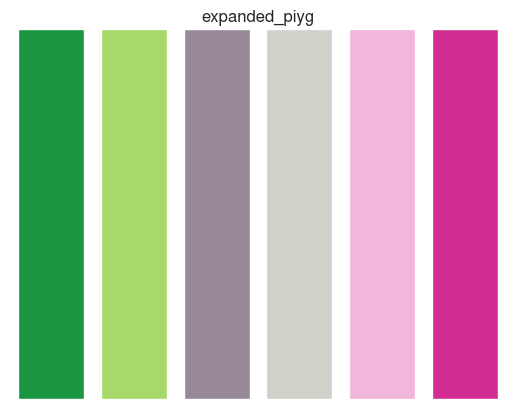

['#1a9641', '#a6d96a', '#978897', '#d1d1ca', '#f1b6da', '#d02c91']


In [34]:
# set display params
sns.set(style = 'white')
# Set the default font to Helvetica
mpl.rcParams['font.family'] = 'Nimbus Sans'
# import matplotlib as mpl
# mpl.rcdefaults()
# Get the color palette of the PiYG color map
expanded_piyg = visualise.color_palette('expanded_piyg').colors
sns.set_palette(expanded_piyg)
# Display the colors in the PiYG color map
visualise.show_colors('expanded_piyg')
print(expanded_piyg)

In [102]:
output_dir = '/mnt/SYNO/macrohet_syno/manuscript/results/hpig_24'#/mnt/DATA/macrohet/results/preliminary_sc_measures/cumulative_sc_plots/thresholded_480/'#'/Users/dayn/data/macrohet_mac/temp_results/'#
os.makedirs(output_dir, exist_ok = True)

In [5]:
df = pd.read_pickle('/mnt/SYNO/macrohet_syno/manuscript/results/dt_df.pkl')
# Assuming your DataFrame is named 'df'
df['Strain/Compound'] = df['Compound']  # Create a new column and copy values from 'Compound'
# Replace values in 'NewColumn' where 'Strain' is 'RD1' with 'RD1'
df.loc[df['Strain'] == 'RD1', 'Strain/Compound'] = 'RD1'
df

,Time (hours),Mtb Area (µm),dMtb Area (µm),Mphi Area (µm),dMphi Area (µm),Infection Status,Initial Infection Status,Final Infection Status,x,y,...,dmtb_7,dt_8,dmtb_8,dt_9,dmtb_9,dt_10,dt_11,dmtb_10,dmtb_11,Strain/Compound
0,0.0,0.424621,-0.424621,459.082108,-92.746118,1.0,1.0,0.0,457.172943,8.791715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RD1
1,1.0,0.000000,-0.424621,372.839393,-92.746118,0.0,1.0,0.0,459.138947,6.718642,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RD1
2,2.0,0.000000,-0.424621,423.168130,-92.746118,0.0,1.0,0.0,460.555237,10.785886,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RD1
3,3.0,0.335227,-0.424621,445.561289,-92.746118,1.0,1.0,0.0,455.878815,11.143067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RD1
4,4.0,0.000000,-0.424621,487.040034,-92.746118,1.0,1.0,0.0,462.634186,14.050420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RD1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722130,74.5,1.117423,1.095075,752.584461,55.088959,1.0,1.0,1.0,227.093262,130.358139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RD1
1722131,75.0,2.033710,1.095075,616.035357,55.088959,1.0,1.0,1.0,226.622925,130.532120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RD1
1722132,75.5,1.430302,1.095075,579.182743,55.088959,1.0,1.0,1.0,225.366608,129.932709,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RD1
1722133,76.0,1.989013,1.095075,679.147414,55.088959,1.0,1.0,1.0,226.424683,128.489410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RD1


In [111]:
len(df[df['Experiment ID'] == 'ND0003']['Unique ID'].unique())

6721

### Quantifying cell counts

In [7]:
subset_df = df[(df['r2']>0.7)]

In [112]:
for r2 in [0.0, 0.4, 0.6, 0.8, 0.9]:
    print(r2)
    for expt_ID in df['Experiment ID'].unique():
        if expt_ID == 'PS0000':
            subset_df = df
        else: 
            subset_df = df[(df['r2']>=r2)]
        expt_df = subset_df[subset_df['Experiment ID'] == expt_ID]
        print(expt_ID, len(expt_df['Unique ID'].unique()))

0.0
PS0000 3914
ND0002 1163
ND0003 4147
0.4
PS0000 3914
ND0002 1029
ND0003 3603
0.6
PS0000 3914
ND0002 899
ND0003 2976
0.8
PS0000 3914
ND0002 692
ND0003 1899
0.9
PS0000 3914
ND0002 475
ND0003 1103


In [27]:
subset_df = df[(df['r2']>0.7) & (df['dt']>0) & (df['Strain/Compound'] != 'RD1')]

In [28]:
hue_order = ['EC50', 'EC0', 'EC99']

### Boxenplot

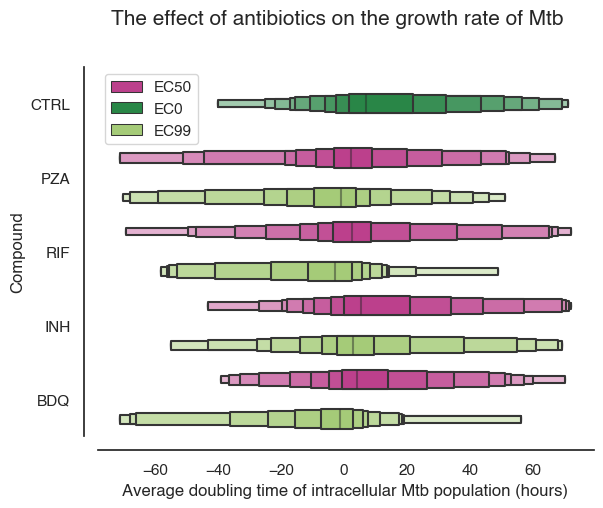

In [55]:
subset_df = df[(df['r2']>0.5) & (df['Strain/Compound'] != 'RD1')]

g = sns.boxenplot(x="dt", y="Compound",
            hue="Concentration", 
            palette=[expanded_piyg[-1], expanded_piyg[0], expanded_piyg[1]],
            data=subset_df,
            hue_order=hue_order,
            scale = 'linear'
              )  
sns.despine(offset = 10)
plt.xlabel("Average doubling time of intracellular Mtb population (hours)")
plt.gcf().suptitle('The effect of antibiotics on the growth rate of Mtb', 
                   fontsize=15, fontweight='bold', 
                  y = 1.0)
sns.despine(offset=10)
plt.legend(loc = 'upper left')
plt.savefig(os.path.join(output_dir, 'ATB_effect_dt.png'), bbox_inches = 'tight', dpi = 314)

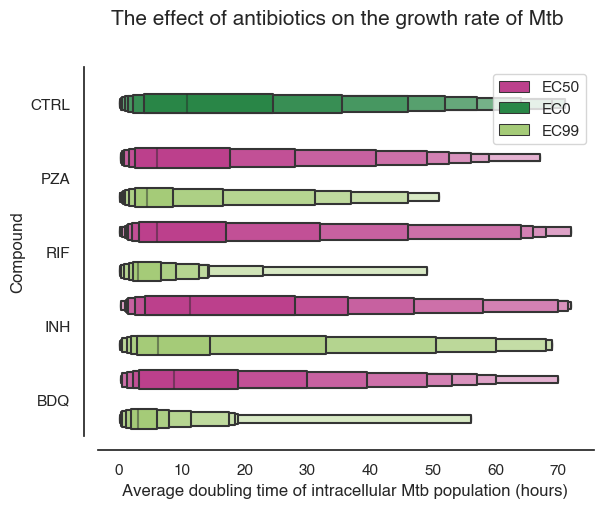

In [62]:
subset_df = df[(df['r2']>0.5) & (df['dt']>0) & (df['Strain/Compound'] != 'RD1')]

g = sns.boxenplot(x="dt", y="Compound",
            hue="Concentration", 
            palette=[expanded_piyg[-1], expanded_piyg[0], expanded_piyg[1]],
            data=subset_df, 
            hue_order=hue_order,
            scale = 'linear'
              )  
sns.despine(offset = 10)
plt.xlabel("Average doubling time of intracellular Mtb population (hours)")
plt.gcf().suptitle('The effect of antibiotics on the growth rate of Mtb', 
                   fontsize=15, fontweight='bold', 
                  y = 1.0)
sns.despine(offset=10)
plt.legend(loc = 'upper right')
plt.savefig(os.path.join(output_dir, 'ATB_effect_dt_gt0.png'), bbox_inches = 'tight', dpi = 314)

# Final graphs

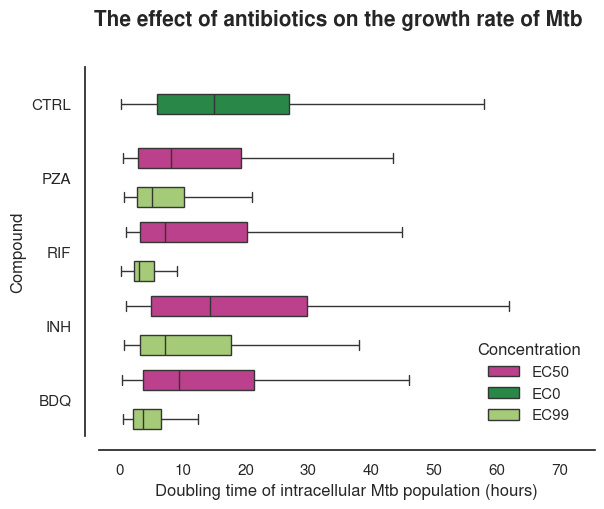

In [343]:
subset_df = df[(df['r2']>0.7) & (df['r2']<1) & (df['dt']>0) & (df['Strain/Compound'] != 'RD1')].drop_duplicates(subset=['ID'])

g = sns.boxplot(x="dt", y="Compound",
            hue="Concentration", 
            palette=[expanded_piyg[-1], expanded_piyg[0], expanded_piyg[1]],
            data=subset_df, 
            hue_order=hue_order, fliersize = 0
            # scale = 'linear'
              )  
sns.despine(offset = 10)
plt.xlabel("Doubling time of intracellular Mtb population (hours)")
plt.gcf().suptitle('The effect of antibiotics on the growth rate of Mtb', 
                   fontsize=15, fontweight='bold', 
                  y = 1.0)
sns.despine(offset=10)
plt.legend(loc = 'lower right', frameon = False, title = 'Concentration')
# plt.xlim(0, 40)
plt.savefig(os.path.join(output_dir, 'ATB_effect_dt_gt0_violin.png'), bbox_inches='tight', dpi=314)


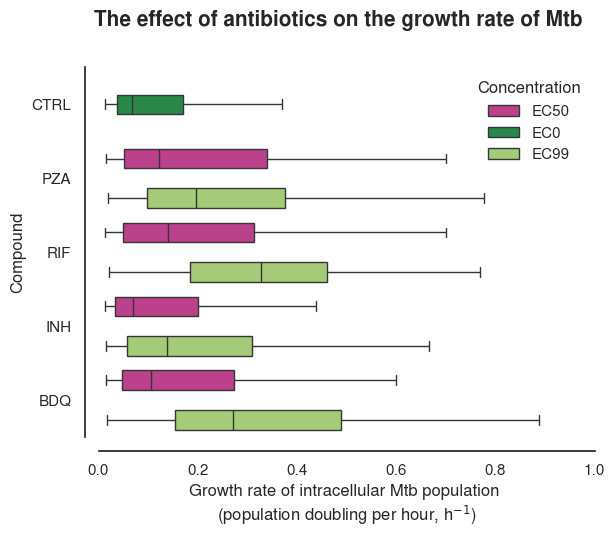

In [342]:
subset_df = df[(df['r2']>0.7) & (df['r2']<1) & (df['dt']>0) & (df['Strain/Compound'] != 'RD1')].drop_duplicates(subset=['ID'])
# Create a new column for the reciprocal of dt
subset_df['reciprocal_dt'] = 1 / subset_df['dt']

# Plot the data using the reciprocal of dt
g = sns.boxplot(x="reciprocal_dt", y="Compound",
                hue="Concentration", 
                palette=[expanded_piyg[-1], expanded_piyg[0], expanded_piyg[1]],
                data=subset_df, 
                hue_order=hue_order, fliersize=0
                # scale = 'linear'
               )  
sns.despine(offset = 10)
plt.xlabel("Growth rate of intracellular Mtb population \n(population doubling per hour, h$^{-1}$)")
plt.gcf().suptitle('The effect of antibiotics on the growth rate of Mtb', 
                   fontsize=15, fontweight='bold', 
                  y = 1.0)
sns.despine(offset=10)
plt.legend(loc = 'upper right', frameon = False, title = 'Concentration')
plt.xlim(0, 1)
plt.savefig(os.path.join(output_dir, 'ATB_effect_1_over_dt_gt0_violin.png'), bbox_inches='tight', dpi=314)


## with stats

Compound: PZA, Concentration: EC50, U-statistic: 42965, p-value: 6.190e-06
Compound: PZA, Concentration: EC99, U-statistic: 20664, p-value: 4.834e-12
Compound: RIF, Concentration: EC50, U-statistic: 38647, p-value: 2.887e-05
Compound: RIF, Concentration: EC99, U-statistic: 7903, p-value: 1.073e-19
Compound: INH, Concentration: EC50, U-statistic: 76635, p-value: 8.891e-01
Compound: INH, Concentration: EC99, U-statistic: 40715, p-value: 2.296e-05
Compound: BDQ, Concentration: EC50, U-statistic: 56633, p-value: 2.635e-04
Compound: BDQ, Concentration: EC99, U-statistic: 7717, p-value: 3.216e-15


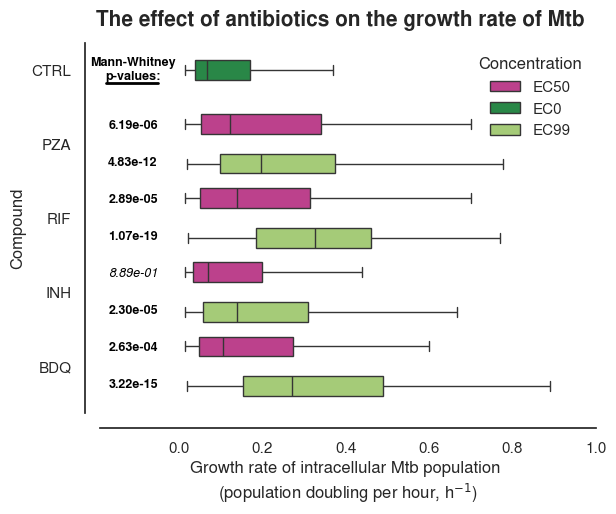

In [341]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mannwhitneyu
import numpy as np
import os

# Assuming expanded_piyg and hue_order are defined elsewhere in your code
# expanded_piyg = ...
# hue_order = ...

# Subset your data and remove duplicates based on Unique_ID
subset_df = df[(df['r2'] > 0.7) & (df['r2'] < 1) & (df['dt'] > 0) & (df['Strain/Compound'] != 'RD1')].drop_duplicates(subset=['ID'])

# Ensure 'dt' is numeric and drop rows with NaNs in 'dt'
subset_df['dt'] = pd.to_numeric(subset_df['dt'], errors='coerce')
subset_df = subset_df.dropna(subset=['dt'])

# Create a new column for the reciprocal of dt
subset_df['reciprocal_dt'] = 1 / subset_df['dt']

# Perform the Mann-Whitney U test for each compound and concentration against the control
control_data = subset_df[subset_df['Compound'] == 'CTRL']['reciprocal_dt']

# List to store p-values
p_values = []

for compound in subset_df['Compound'].unique():
    if compound != 'CTRL':
        for concentration in subset_df['Concentration'].unique():
            compound_data = subset_df[(subset_df['Compound'] == compound) & (subset_df['Concentration'] == concentration)]['reciprocal_dt']
            if not compound_data.empty:
                stat, p_value = mannwhitneyu(control_data, compound_data)
                p_values.append((compound, concentration, stat, p_value))
                print(f"Compound: {compound}, Concentration: {concentration}, U-statistic: {int(stat)}, p-value: {p_value:.3e}")

# Plot the data using the reciprocal of dt
g = sns.boxplot(x="reciprocal_dt", y="Compound",
                hue="Concentration", 
                palette=[expanded_piyg[-1], expanded_piyg[0], expanded_piyg[1]],
                data=subset_df, 
                hue_order=hue_order, fliersize=0)  

sns.despine(offset=10)
plt.xlabel("Growth rate of intracellular Mtb population \n(population doubling per hour, h$^{-1}$)")
plt.gcf().suptitle('The effect of antibiotics on the growth rate of Mtb', 
                   fontsize=15, fontweight='bold', 
                   y=0.95)
sns.despine(offset=11)
plt.legend(loc='upper right', frameon=False, title='Concentration')


xlim_min = -0.19
plt.xlim(xlim_min, 1)

# Annotate p-values on the plot
for i, (compound, concentration, stat, p_value) in enumerate(p_values):   
    positions = subset_df[(subset_df['Compound'] == compound) & (subset_df['Concentration'] == concentration)]
    if not positions.empty:
        x = xlim_min # positions['dt'].quantile(0.75) + 1.5 * (positions['dt'].quantile(0.75) - positions['dt'].quantile(0.25))  # position of the end of the whisker
        y = list(subset_df['Compound'].unique()).index(compound)
        y_offset = hue_order.index(concentration) * 0.25 - 0.25  # Adjust this multiplier to better space annotations
        if p_value < 0.1:
            p_text = f'{p_value:.2e}'# Italicize p-values below 0.1
            plt.annotate(f'{p_text}', xy=(x+0.02, y + y_offset), xycoords='data',
                             horizontalalignment='left', verticalalignment='center',
                             fontsize=9, color='black', fontweight = 'bold')
        else:
            p_text = f'{p_value:.2e}'
            plt.annotate(f'{p_text}', xy=(x+0.02, y + y_offset), xycoords='data',
                         horizontalalignment='left', verticalalignment='center',
                         fontsize=9, color='black', style = 'italic')
# print the p value column title
plt.annotate(f'Mann-Whitney\np-values:', xy=(xlim_min+0.08, 0.13),
                         fontsize=9, color='black', fontweight = 'bold', horizontalalignment = 'center')
plt.plot([xlim_min+0.015, xlim_min+0.14], [0.18, 0.18], color='black', lw=2)  # Draw a line under the title


plt.savefig(os.path.join(output_dir, 'ATB_effect_1_over_dt_gt0_boxplot_stats.png'), bbox_inches='tight', dpi=314)

# Display the plot
plt.show()


Compound: PZA, Concentration: EC50, U-statistic: 67634, p-value: 6.190e-06
Compound: PZA, Concentration: EC99, U-statistic: 49488, p-value: 4.834e-12
Compound: RIF, Concentration: EC50, U-statistic: 59944, p-value: 2.887e-05
Compound: RIF, Concentration: EC99, U-statistic: 37600, p-value: 1.073e-19
Compound: INH, Concentration: EC50, U-statistic: 77572, p-value: 8.891e-01
Compound: INH, Concentration: EC99, U-statistic: 62933, p-value: 2.296e-05
Compound: BDQ, Concentration: EC50, U-statistic: 79247, p-value: 2.635e-04
Compound: BDQ, Concentration: EC99, U-statistic: 31466, p-value: 3.216e-15


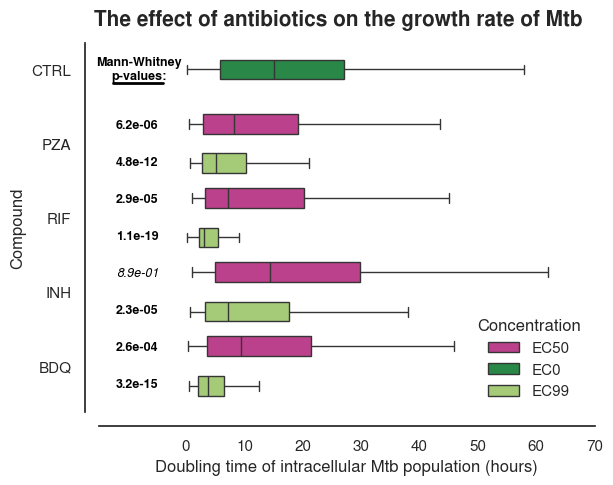

In [319]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mannwhitneyu
import numpy as np
import os



# Assuming expanded_piyg and hue_order are defined elsewhere in your code
# expanded_piyg = ...
# hue_order = ...

# Subset your data and remove duplicates based on Unique_ID
subset_df = df[(df['r2'] > 0.7) & (df['r2'] < 1) & (df['dt'] > 0) & (df['Strain/Compound'] != 'RD1')].drop_duplicates(subset=['ID'])

# Ensure 'dt' is numeric and drop rows with NaNs in 'dt'
subset_df['dt'] = pd.to_numeric(subset_df['dt'], errors='coerce')
subset_df = subset_df.dropna(subset=['dt'])


# Perform the Mann-Whitney U test for each compound and concentration against the control
control_data = subset_df[subset_df['Compound'] == 'CTRL']['dt']

# List to store p-values
p_values = []

for compound in subset_df['Compound'].unique():
    if compound != 'CTRL':
        for concentration in subset_df['Concentration'].unique():
            compound_data = subset_df[(subset_df['Compound'] == compound) & (subset_df['Concentration'] == concentration)]['dt']
            if not compound_data.empty:
                stat, p_value = mannwhitneyu(control_data, compound_data)
                p_values.append((compound, concentration, stat, p_value))
                print(f"Compound: {compound}, Concentration: {concentration}, U-statistic: {int(stat)}, p-value: {p_value:.3e}")

# Plot the data using the reciprocal of dt
g = sns.boxplot(x="dt", y="Compound",
                hue="Concentration", 
                palette=[expanded_piyg[-1], expanded_piyg[0], expanded_piyg[1]],
                data=subset_df, 
                hue_order=hue_order, fliersize=0)  

plt.xlabel("Doubling time of intracellular Mtb population (hours)")
plt.gcf().suptitle('The effect of antibiotics on the growth rate of Mtb', 
                   fontsize=15, fontweight='bold', 
                   y=0.95)
sns.despine(offset=10)
plt.legend(loc='lower right', frameon=False, title='Concentration')
xlim_min = -15
plt.xlim(xlim_min, 70)

# Annotate p-values on the plot
for i, (compound, concentration, stat, p_value) in enumerate(p_values):   
    positions = subset_df[(subset_df['Compound'] == compound) & (subset_df['Concentration'] == concentration)]
    if not positions.empty:
        x = xlim_min # positions['dt'].quantile(0.75) + 1.5 * (positions['dt'].quantile(0.75) - positions['dt'].quantile(0.25))  # position of the end of the whisker
        y = list(subset_df['Compound'].unique()).index(compound)
        y_offset = hue_order.index(concentration) * 0.25 - 0.25  # Adjust this multiplier to better space annotations
        if p_value < 0.1:
            p_text = f'{p_value:.1e}'# Italicize p-values below 0.1
            plt.annotate(f'{p_text}', xy=(x+3, y + y_offset), xycoords='data',
                             horizontalalignment='left', verticalalignment='center',
                             fontsize=9, color='black', fontweight = 'bold')
        else:
            p_text = f'{p_value:.1e}'
            plt.annotate(f'{p_text}', xy=(x+3, y + y_offset), xycoords='data',
                         horizontalalignment='left', verticalalignment='center',
                         fontsize=9, color='black', style = 'italic')
# print the p value column title
plt.annotate(f'Mann-Whitney\np-values:', xy=(xlim_min+7, 0.13),
                         fontsize=9, color='black', fontweight = 'bold', horizontalalignment = 'center')
plt.plot([xlim_min+2.5, xlim_min+11], [0.18, 0.18], color='black', lw=2)  # Draw a line under the title

plt.xticks(np.arange(0, 71, 10))  # Display x-axis labels from 0 to 70 with a step of 10
plt.savefig(os.path.join(output_dir, 'ATB_effect_dt_gt0_boxplot_stats.png'), bbox_inches='tight', dpi=314)

# Display the plot
plt.show()

## just ec99/50

Compound: PZA, Concentration: EC50, U-statistic: 67634, p-value: 6.190e-06
Compound: RIF, Concentration: EC50, U-statistic: 59944, p-value: 2.887e-05
Compound: INH, Concentration: EC50, U-statistic: 77572, p-value: 8.891e-01
Compound: BDQ, Concentration: EC50, U-statistic: 79247, p-value: 2.635e-04


/tmp/ipykernel_2892626/3122108261.py:38: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  g = sns.boxplot(x="dt", y="Compound",


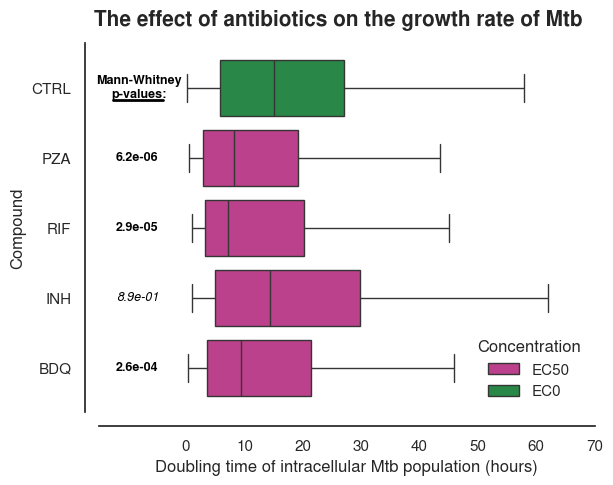

In [327]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mannwhitneyu
import numpy as np
import os



# Assuming expanded_piyg and hue_order are defined elsewhere in your code
# expanded_piyg = ...
# hue_order = ...

# Subset your data and remove duplicates based on Unique_ID
subset_df = df[(df['r2'] > 0.7) & (df['r2'] < 1) & (df['dt'] > 0) & (df['Strain/Compound'] != 'RD1') & (df['Concentration'] != 'EC99')].drop_duplicates(subset=['ID'])

# Ensure 'dt' is numeric and drop rows with NaNs in 'dt'
subset_df['dt'] = pd.to_numeric(subset_df['dt'], errors='coerce')
subset_df = subset_df.dropna(subset=['dt'])


# Perform the Mann-Whitney U test for each compound and concentration against the control
control_data = subset_df[subset_df['Compound'] == 'CTRL']['dt']

# List to store p-values
p_values = []

for compound in subset_df['Compound'].unique():
    if compound != 'CTRL':
        for concentration in subset_df['Concentration'].unique():
            compound_data = subset_df[(subset_df['Compound'] == compound) & (subset_df['Concentration'] == concentration)]['dt']
            if not compound_data.empty:
                stat, p_value = mannwhitneyu(control_data, compound_data)
                p_values.append((compound, concentration, stat, p_value))
                print(f"Compound: {compound}, Concentration: {concentration}, U-statistic: {int(stat)}, p-value: {p_value:.3e}")

# Plot the data using the reciprocal of dt
g = sns.boxplot(x="dt", y="Compound",
                hue="Concentration", 
                palette=[expanded_piyg[-1], expanded_piyg[0], expanded_piyg[1]],
                data=subset_df, 
                hue_order=[con for con in hue_order if con != 'EC99'],  # Ensure EC99 is excluded from hue_order
                fliersize=0)  

plt.xlabel("Doubling time of intracellular Mtb population (hours)")
plt.gcf().suptitle('The effect of antibiotics on the growth rate of Mtb', 
                   fontsize=15, fontweight='bold', 
                   y=0.95)
sns.despine(offset=10)
plt.legend(loc='lower right', frameon=False, title='Concentration')
xlim_min = -15
plt.xlim(xlim_min, 70)

# Annotate p-values on the plot
for i, (compound, concentration, stat, p_value) in enumerate(p_values):   
    positions = subset_df[(subset_df['Compound'] == compound) & (subset_df['Concentration'] == concentration)]
    if not positions.empty:
        x = xlim_min # positions['dt'].quantile(0.75) + 1.5 * (positions['dt'].quantile(0.75) - positions['dt'].quantile(0.25))  # position of the end of the whisker
        y = list(subset_df['Compound'].unique()).index(compound)
        y_offset = 0 #hue_order.index(concentration) * 0.25 - 0.25  # Adjust this multiplier to better space annotations
        if p_value < 0.1:
            p_text = f'{p_value:.1e}'# Italicize p-values below 0.1
            plt.annotate(f'{p_text}', xy=(x+3, y + y_offset), xycoords='data',
                             horizontalalignment='left', verticalalignment='center',
                             fontsize=9, color='black', fontweight = 'bold')
        else:
            p_text = f'{p_value:.1e}'
            plt.annotate(f'{p_text}', xy=(x+3, y + y_offset), xycoords='data',
                         horizontalalignment='left', verticalalignment='center',
                         fontsize=9, color='black', style = 'italic')
# print the p value column title
plt.annotate(f'Mann-Whitney\np-values:', xy=(xlim_min+7, 0.13),
                         fontsize=9, color='black', fontweight = 'bold', horizontalalignment = 'center')
plt.plot([xlim_min+2.5, xlim_min+11], [0.18, 0.18], color='black', lw=2)  # Draw a line under the title

plt.xticks(np.arange(0, 71, 10))  # Display x-axis labels from 0 to 70 with a step of 10
plt.savefig(os.path.join(output_dir, 'ATB_effect_dt_gt0_boxplot_EC50_stats.png'), bbox_inches='tight', dpi=314)

# Display the plot
plt.show()

Compound: PZA, Concentration: EC99, U-statistic: 49488, p-value: 4.834e-12
Compound: RIF, Concentration: EC99, U-statistic: 37600, p-value: 1.073e-19
Compound: INH, Concentration: EC99, U-statistic: 62933, p-value: 2.296e-05
Compound: BDQ, Concentration: EC99, U-statistic: 31466, p-value: 3.216e-15


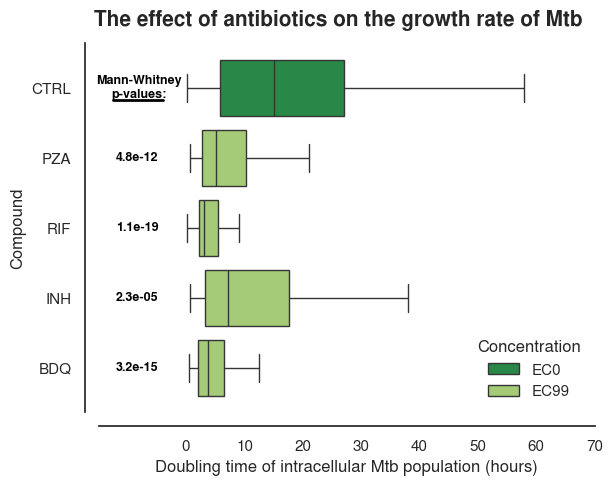

In [330]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mannwhitneyu
import numpy as np
import os



# Assuming expanded_piyg and hue_order are defined elsewhere in your code
# expanded_piyg = ...
# hue_order = ...

# Subset your data and remove duplicates based on Unique_ID
subset_df = df[(df['r2'] > 0.7) & (df['r2'] < 1) & (df['dt'] > 0) & (df['Strain/Compound'] != 'RD1') & (df['Concentration'] != 'EC50')].drop_duplicates(subset=['ID'])

# Ensure 'dt' is numeric and drop rows with NaNs in 'dt'
subset_df['dt'] = pd.to_numeric(subset_df['dt'], errors='coerce')
subset_df = subset_df.dropna(subset=['dt'])


# Perform the Mann-Whitney U test for each compound and concentration against the control
control_data = subset_df[subset_df['Compound'] == 'CTRL']['dt']

# List to store p-values
p_values = []

for compound in subset_df['Compound'].unique():
    if compound != 'CTRL':
        for concentration in subset_df['Concentration'].unique():
            compound_data = subset_df[(subset_df['Compound'] == compound) & (subset_df['Concentration'] == concentration)]['dt']
            if not compound_data.empty:
                stat, p_value = mannwhitneyu(control_data, compound_data)
                p_values.append((compound, concentration, stat, p_value))
                print(f"Compound: {compound}, Concentration: {concentration}, U-statistic: {int(stat)}, p-value: {p_value:.3e}")

# Plot the data using the reciprocal of dt
g = sns.boxplot(x="dt", y="Compound",
                hue="Concentration", 
                palette=[expanded_piyg[0], expanded_piyg[1]],#, expanded_piyg[1]],
                data=subset_df, 
                hue_order=[con for con in hue_order if con != 'EC50'],  # Ensure EC99 is excluded from hue_order
                fliersize=0)  

plt.xlabel("Doubling time of intracellular Mtb population (hours)")
plt.gcf().suptitle('The effect of antibiotics on the growth rate of Mtb', 
                   fontsize=15, fontweight='bold', 
                   y=0.95)
sns.despine(offset=10)
plt.legend(loc='lower right', frameon=False, title='Concentration')
xlim_min = -15
plt.xlim(xlim_min, 70)

# Annotate p-values on the plot
for i, (compound, concentration, stat, p_value) in enumerate(p_values):   
    positions = subset_df[(subset_df['Compound'] == compound) & (subset_df['Concentration'] == concentration)]
    if not positions.empty:
        x = xlim_min # positions['dt'].quantile(0.75) + 1.5 * (positions['dt'].quantile(0.75) - positions['dt'].quantile(0.25))  # position of the end of the whisker
        y = list(subset_df['Compound'].unique()).index(compound)
        y_offset = 0 #hue_order.index(concentration) * 0.25 - 0.25  # Adjust this multiplier to better space annotations
        if p_value < 0.1:
            p_text = f'{p_value:.1e}'# Italicize p-values below 0.1
            plt.annotate(f'{p_text}', xy=(x+3, y + y_offset), xycoords='data',
                             horizontalalignment='left', verticalalignment='center',
                             fontsize=9, color='black', fontweight = 'bold')
        else:
            p_text = f'{p_value:.1e}'
            plt.annotate(f'{p_text}', xy=(x+3, y + y_offset), xycoords='data',
                         horizontalalignment='left', verticalalignment='center',
                         fontsize=9, color='black', style = 'italic')
# print the p value column title
plt.annotate(f'Mann-Whitney\np-values:', xy=(xlim_min+7, 0.13),
                         fontsize=9, color='black', fontweight = 'bold', horizontalalignment = 'center')
plt.plot([xlim_min+2.5, xlim_min+11], [0.18, 0.18], color='black', lw=2)  # Draw a line under the title

plt.xticks(np.arange(0, 71, 10))  # Display x-axis labels from 0 to 70 with a step of 10
plt.savefig(os.path.join(output_dir, 'ATB_effect_dt_gt0_boxplot_EC99_stats.png'), bbox_inches='tight', dpi=314)

# Display the plot
plt.show()

Compound: PZA, Concentration: EC50, U-statistic: 42965, p-value: 6.190e-06
Compound: RIF, Concentration: EC50, U-statistic: 38647, p-value: 2.887e-05
Compound: INH, Concentration: EC50, U-statistic: 76635, p-value: 8.891e-01
Compound: BDQ, Concentration: EC50, U-statistic: 56633, p-value: 2.635e-04


/tmp/ipykernel_2892626/4253574132.py:38: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  g = sns.boxplot(x="reciprocal_dt", y="Compound",


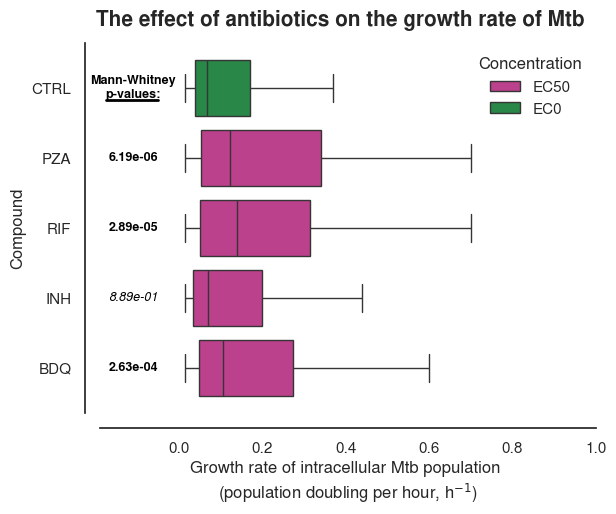

In [339]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mannwhitneyu
import numpy as np
import os

# Assuming expanded_piyg and hue_order are defined elsewhere in your code
# expanded_piyg = ...
# hue_order = ...

# Subset your data and remove duplicates based on Unique_ID
subset_df = df[(df['r2'] > 0.7) & (df['r2'] < 1) & (df['dt'] > 0) & (df['Strain/Compound'] != 'RD1') & (df['Concentration'] != 'EC99')].drop_duplicates(subset=['ID'])

# Ensure 'dt' is numeric and drop rows with NaNs in 'dt'
subset_df['dt'] = pd.to_numeric(subset_df['dt'], errors='coerce')
subset_df = subset_df.dropna(subset=['dt'])

# Create a new column for the reciprocal of dt
subset_df['reciprocal_dt'] = 1 / subset_df['dt']

# Perform the Mann-Whitney U test for each compound and concentration against the control
control_data = subset_df[subset_df['Compound'] == 'CTRL']['reciprocal_dt']

# List to store p-values
p_values = []

for compound in subset_df['Compound'].unique():
    if compound != 'CTRL':
        for concentration in subset_df['Concentration'].unique():
            compound_data = subset_df[(subset_df['Compound'] == compound) & (subset_df['Concentration'] == concentration)]['reciprocal_dt']
            if not compound_data.empty:
                stat, p_value = mannwhitneyu(control_data, compound_data)
                p_values.append((compound, concentration, stat, p_value))
                print(f"Compound: {compound}, Concentration: {concentration}, U-statistic: {int(stat)}, p-value: {p_value:.3e}")

# Plot the data using the reciprocal of dt
g = sns.boxplot(x="reciprocal_dt", y="Compound",
                hue="Concentration", 
                palette=[expanded_piyg[-1], expanded_piyg[0], expanded_piyg[1]],
                data=subset_df, 
                hue_order=[con for con in hue_order if con != 'EC99'], fliersize=0)  

sns.despine(offset=10)
plt.xlabel("Growth rate of intracellular Mtb population \n(population doubling per hour, h$^{-1}$)")
plt.gcf().suptitle('The effect of antibiotics on the growth rate of Mtb', 
                   fontsize=15, fontweight='bold', 
                   y=0.95)
sns.despine(offset=11)
plt.legend(loc='upper right', frameon=False, title='Concentration')


xlim_min = -0.19
plt.xlim(xlim_min, 1)

# Annotate p-values on the plot
for i, (compound, concentration, stat, p_value) in enumerate(p_values):   
    positions = subset_df[(subset_df['Compound'] == compound) & (subset_df['Concentration'] == concentration)]
    if not positions.empty:
        x = xlim_min # positions['dt'].quantile(0.75) + 1.5 * (positions['dt'].quantile(0.75) - positions['dt'].quantile(0.25))  # position of the end of the whisker
        y = list(subset_df['Compound'].unique()).index(compound)
        y_offset = 0 #hue_order.index(concentration) * 0.25 - 0.25  # Adjust this multiplier to better space annotations
        if p_value < 0.1:
            p_text = f'{p_value:.2e}'# Italicize p-values below 0.1
            plt.annotate(f'{p_text}', xy=(x+0.02, y + y_offset), xycoords='data',
                             horizontalalignment='left', verticalalignment='center',
                             fontsize=9, color='black', fontweight = 'bold')
        else:
            p_text = f'{p_value:.2e}'
            plt.annotate(f'{p_text}', xy=(x+0.02, y + y_offset), xycoords='data',
                         horizontalalignment='left', verticalalignment='center',
                         fontsize=9, color='black', style = 'italic')
# print the p value column title
plt.annotate(f'Mann-Whitney\np-values:', xy=(xlim_min+0.08, 0.13),
                         fontsize=9, color='black', fontweight = 'bold', horizontalalignment = 'center')
plt.plot([xlim_min+0.015, xlim_min+0.14], [0.18, 0.18], color='black', lw=2)  # Draw a line under the title


plt.savefig(os.path.join(output_dir, 'ATB_effect_1_over_dt_gt0_boxplot_EC50_stats.png'), bbox_inches='tight', dpi=314)

# Display the plot
plt.show()


Compound: PZA, Concentration: EC99, U-statistic: 20664, p-value: 4.834e-12
Compound: RIF, Concentration: EC99, U-statistic: 7903, p-value: 1.073e-19
Compound: INH, Concentration: EC99, U-statistic: 40715, p-value: 2.296e-05
Compound: BDQ, Concentration: EC99, U-statistic: 7717, p-value: 3.216e-15


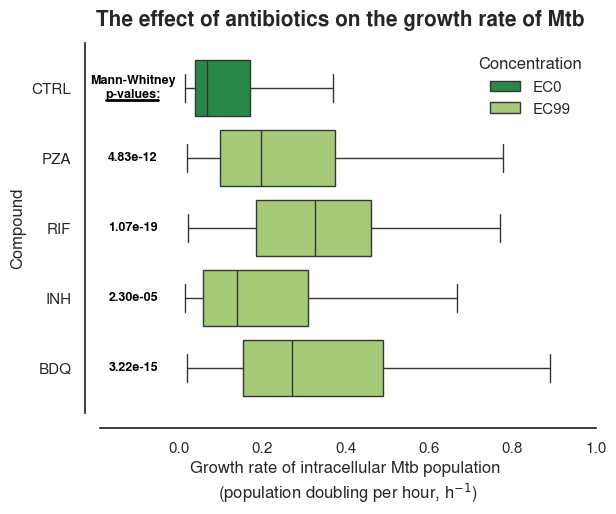

In [340]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mannwhitneyu
import numpy as np
import os

# Assuming expanded_piyg and hue_order are defined elsewhere in your code
# expanded_piyg = ...
# hue_order = ...

# Subset your data and remove duplicates based on Unique_ID
subset_df = df[(df['r2'] > 0.7) & (df['r2'] < 1) & (df['dt'] > 0) & (df['Strain/Compound'] != 'RD1') & (df['Concentration'] != 'EC50')].drop_duplicates(subset=['ID'])

# Ensure 'dt' is numeric and drop rows with NaNs in 'dt'
subset_df['dt'] = pd.to_numeric(subset_df['dt'], errors='coerce')
subset_df = subset_df.dropna(subset=['dt'])

# Create a new column for the reciprocal of dt
subset_df['reciprocal_dt'] = 1 / subset_df['dt']

# Perform the Mann-Whitney U test for each compound and concentration against the control
control_data = subset_df[subset_df['Compound'] == 'CTRL']['reciprocal_dt']

# List to store p-values
p_values = []

for compound in subset_df['Compound'].unique():
    if compound != 'CTRL':
        for concentration in subset_df['Concentration'].unique():
            compound_data = subset_df[(subset_df['Compound'] == compound) & (subset_df['Concentration'] == concentration)]['reciprocal_dt']
            if not compound_data.empty:
                stat, p_value = mannwhitneyu(control_data, compound_data)
                p_values.append((compound, concentration, stat, p_value))
                print(f"Compound: {compound}, Concentration: {concentration}, U-statistic: {int(stat)}, p-value: {p_value:.3e}")

# Plot the data using the reciprocal of dt
g = sns.boxplot(x="reciprocal_dt", y="Compound",
                hue="Concentration", 
                palette=[expanded_piyg[0], expanded_piyg[1]],# expanded_piyg[1]],
                data=subset_df, 
                hue_order=[con for con in hue_order if con != 'EC50'], fliersize=0)  

sns.despine(offset=10)
plt.xlabel("Growth rate of intracellular Mtb population \n(population doubling per hour, h$^{-1}$)")
plt.gcf().suptitle('The effect of antibiotics on the growth rate of Mtb', 
                   fontsize=15, fontweight='bold', 
                   y=0.95)
sns.despine(offset=11)
plt.legend(loc='upper right', frameon=False, title='Concentration')


xlim_min = -0.19
plt.xlim(xlim_min, 1)

# Annotate p-values on the plot
for i, (compound, concentration, stat, p_value) in enumerate(p_values):   
    positions = subset_df[(subset_df['Compound'] == compound) & (subset_df['Concentration'] == concentration)]
    if not positions.empty:
        x = xlim_min # positions['dt'].quantile(0.75) + 1.5 * (positions['dt'].quantile(0.75) - positions['dt'].quantile(0.25))  # position of the end of the whisker
        y = list(subset_df['Compound'].unique()).index(compound)
        y_offset = 0 #hue_order.index(concentration) * 0.25 - 0.25  # Adjust this multiplier to better space annotations
        if p_value < 0.1:
            p_text = f'{p_value:.2e}'# Italicize p-values below 0.1
            plt.annotate(f'{p_text}', xy=(x+0.02, y + y_offset), xycoords='data',
                             horizontalalignment='left', verticalalignment='center',
                             fontsize=9, color='black', fontweight = 'bold')
        else:
            p_text = f'{p_value:.2e}'
            plt.annotate(f'{p_text}', xy=(x+0.02, y + y_offset), xycoords='data',
                         horizontalalignment='left', verticalalignment='center',
                         fontsize=9, color='black', style = 'italic')
# print the p value column title
plt.annotate(f'Mann-Whitney\np-values:', xy=(xlim_min+0.08, 0.13),
                         fontsize=9, color='black', fontweight = 'bold', horizontalalignment = 'center')
plt.plot([xlim_min+0.015, xlim_min+0.14], [0.18, 0.18], color='black', lw=2)  # Draw a line under the title


plt.savefig(os.path.join(output_dir, 'ATB_effect_1_over_dt_gt0_boxplot_EC99_stats.png'), bbox_inches='tight', dpi=314)

# Display the plot
plt.show()


## histograms

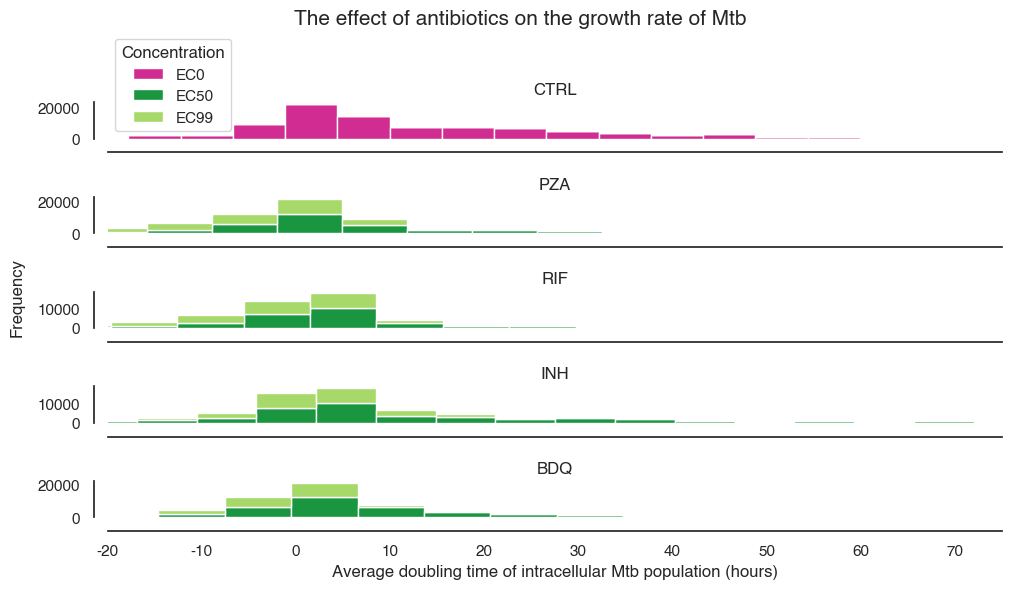

In [82]:
# Your existing DataFrame after filtering
subset_df = df[(df['r2'] > 0.5) & (df['Strain/Compound'] != 'RD1')]

# Define the palette
palette = [expanded_piyg[-1], expanded_piyg[0], expanded_piyg[1]]  # Make sure these colors are defined

# Unique compounds and concentrations
compounds = subset_df['Compound'].unique()
concentrations = subset_df['Concentration'].unique()

# Set up the plot
fig, axes = plt.subplots(len(compounds), 1, figsize=(10, 6), sharex=True)  # Use fig, axes for subplot management
if len(compounds) == 1:  # Handle case where there's only one compound
    axes = [axes]

for i, (ax, compound) in enumerate(zip(axes, compounds)):
    data = [subset_df[(subset_df['Compound'] == compound) & (subset_df['Concentration'] == conc)]['dt'].dropna() for conc in concentrations]
    ax.hist(data, bins=20, stacked=True, label=concentrations, color=palette)
    ax.set_title(compound)
    if i == 0:
        ax.legend(title='Concentration')
    if i < len(compounds) - 1:
        ax.set_xticklabels([])  # Hide x ticks for all but the last subplot
    else:
        ax.set_xticks(np.arange(-20, 80, 10))  # Set specific x-ticks for the last plot if necessary
        ax.set_xticklabels(np.arange(-20, 80, 10))  # Ensure labels are visible

fig.text(-0.01, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=12)  # Add a common y-axis label
plt.xlabel("Average doubling time of intracellular Mtb population (hours)")
plt.suptitle('The effect of antibiotics on the growth rate of Mtb', fontsize=15, fontweight='bold')
sns.despine(offset=10)
fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for suptitle
# Set the limits for the x-axis if necessary  # Adjust layout to make room for suptitle
plt.xlim(-20, 75)
plt.savefig(os.path.join(output_dir, 'ATB_effect_hist_dt.png'), bbox_inches = 'tight', dpi = 314)
plt.show()

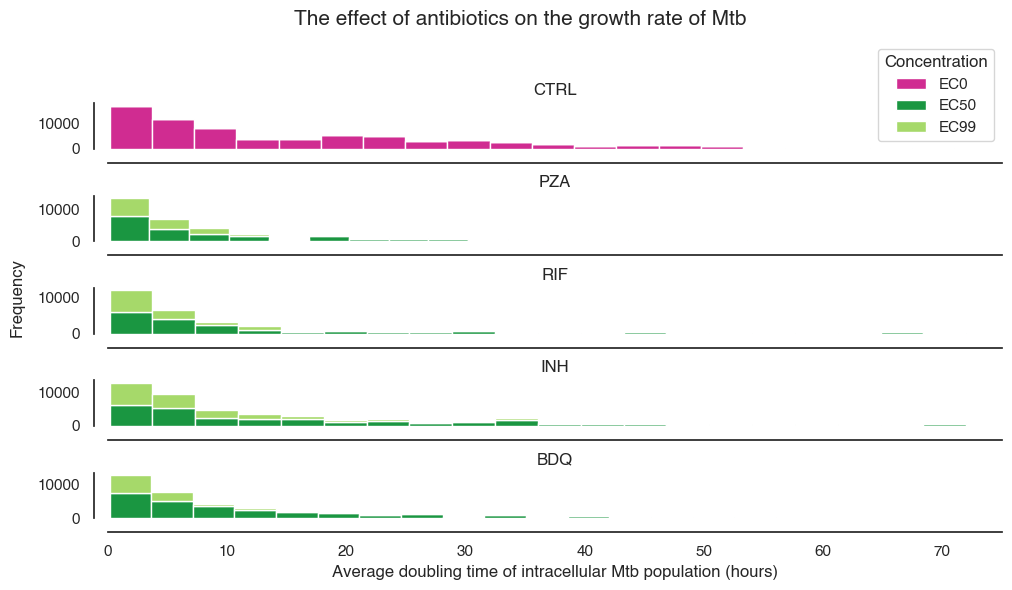

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Your existing DataFrame after filtering
subset_df = df[(df['r2'] > 0.5) & (df['dt'] > 0) & (df['Strain/Compound'] != 'RD1')]

# Define the palette
palette = [expanded_piyg[-1], expanded_piyg[0], expanded_piyg[1]]  # Make sure these colors are defined

# Unique compounds and concentrations
compounds = subset_df['Compound'].unique()
concentrations = subset_df['Concentration'].unique()

# Set up the plot
fig, axes = plt.subplots(len(compounds), 1, figsize=(10, 6), sharex=True)  # Use fig, axes for subplot management
if len(compounds) == 1:  # Handle case where there's only one compound
    axes = [axes]

for i, (ax, compound) in enumerate(zip(axes, compounds)):
    data = [subset_df[(subset_df['Compound'] == compound) & (subset_df['Concentration'] == conc)]['dt'].dropna() for conc in concentrations]
    ax.hist(data, bins=20, stacked=True, label=concentrations, color=palette)
    ax.set_title(compound)
    if i == 0:
        ax.legend(title='Concentration')
    if i < len(compounds) - 1:
        ax.set_xticklabels([])  # Hide x ticks for all but the last subplot
    else:
        ax.set_xticks(np.arange(0, 80, 10))  # Set specific x-ticks for the last plot if necessary
        ax.set_xticklabels(np.arange(0, 80, 10))  # Ensure labels are visible

fig.text(-0.01, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=12)  # Add a common y-axis label
plt.xlabel("Average doubling time of intracellular Mtb population (hours)")
plt.suptitle('The effect of antibiotics on the growth rate of Mtb', fontsize=15, fontweight='bold')
sns.despine(offset=10)
fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for suptitle
plt.xlim(0, 75)  # Set the limits for the x-axis if necessary
plt.savefig(os.path.join(output_dir, 'ATB_effect_hist_dt_gt0.png'), bbox_inches='tight', dpi=314)
plt.show()

# ARX

In [8]:
# df['dMtb'] = df['delta Mtb max fold-change normalised max area']
df['Mtb'] = df['Mtb Area'] #df['Intracellular thresholded Mtb content smooth']

In [23]:
unique_ID = '85.4.5'
sc_df = df.loc[unique_ID]
sc_df

,Time (hours),Mtb Area,dMtb,Strain,Compound,Concentration,Unique ID,Acquisition ID,Cell ID,Mphi Area,...,Strain/Compound,dMtb/dt,%dMtb/dt,%dMtb,Mean Mtb Intensity,Thresholded Mean Mtb Intensity,Infection Status,Initial Infection Status,Final Infection Status,Rolling Avg dMtb/dt
281595,0,2675.0,5384.0,WT,CTRL,EC0,85.4.5,"(4, 5)",85,46764.0,...,CTRL,0.0,0.000000,201.271028,443.901398,127.701759,True,True,True,0.104293
281596,1,2376.0,5384.0,WT,CTRL,EC0,85.4.5,"(4, 5)",85,62884.0,...,CTRL,-299.0,-11.177570,201.271028,402.362885,75.280693,True,True,True,-20.000379
281597,2,2276.0,5384.0,WT,CTRL,EC0,85.4.5,"(4, 5)",85,67435.0,...,CTRL,-100.0,-4.208754,201.271028,390.603058,62.043819,True,True,True,-26.695353
281598,3,2608.0,5384.0,WT,CTRL,EC0,85.4.5,"(4, 5)",85,48134.0,...,CTRL,332.0,14.586995,201.271028,428.111389,112.511589,True,True,True,-4.615656
281599,4,2398.0,5384.0,WT,CTRL,EC0,85.4.5,"(4, 5)",85,60039.0,...,CTRL,-210.0,-8.052147,201.271028,403.103180,79.544876,True,True,True,-18.585858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281665,70,9059.0,5384.0,WT,CTRL,EC0,85.4.5,"(4, 5)",85,14227.0,...,CTRL,155.0,1.740791,201.271028,2083.896240,1993.407959,True,True,True,68.266667
281666,71,8928.0,5384.0,WT,CTRL,EC0,85.4.5,"(4, 5)",85,13664.0,...,CTRL,-131.0,-1.446076,201.271028,2144.229248,2056.757812,True,True,True,49.000000
281667,72,8303.0,5384.0,WT,CTRL,EC0,85.4.5,"(4, 5)",85,12339.0,...,CTRL,-625.0,-7.000448,201.271028,2249.445312,2164.719971,True,True,True,4.333333
281668,73,6219.0,5384.0,WT,CTRL,EC0,85.4.5,"(4, 5)",85,9494.0,...,CTRL,-2084.0,-25.099362,201.271028,2205.718750,2113.622314,True,True,True,-149.933333


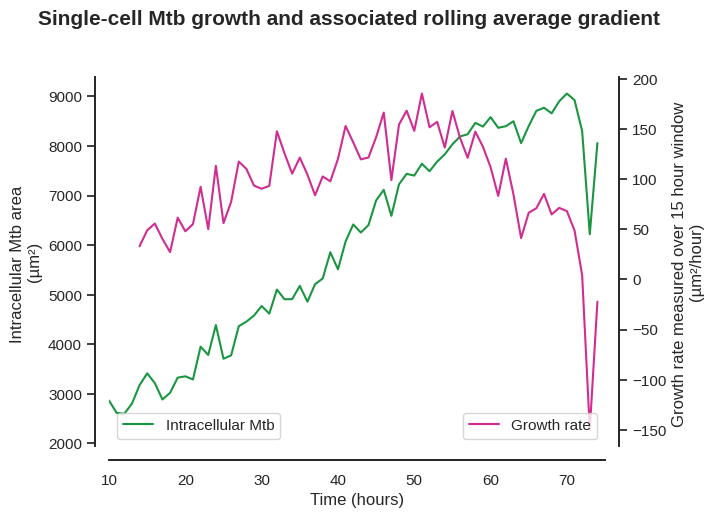

In [27]:

# Calculate the rolling average of 'dMtb/dt' over a specified window (e.g., 15)
window_size = 15
sc_df['Rolling Avg dMtb/dt'] = sc_df['dMtb/dt'].rolling(window=window_size).mean()

# Create the first plot
ax1 = sns.lineplot(x='Time (hours)', y='Mtb Area', data=sc_df, color=expanded_piyg[0], label='Intracellular Mtb')
plt.legend(loc='lower left')
ax1.set_ylabel('Intracellular Mtb area \n(µm\u00b2)')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the rolling average on the second y-axis
sns.lineplot(x='Time (hours)', y='Rolling Avg dMtb/dt', data=sc_df, ax=ax2, color=expanded_piyg[-1], label='Growth rate')  # Adjust color as needed

# Set the y-axis label for the second y-axis
ax2.set_ylabel(f'Growth rate measured over {window_size} hour window \n(µm\u00b2/hour)')
plt.legend(loc='lower right')

# Adjust plot appearance
sns.despine(offset=10, top=True, right=False)
plt.xlim(10, 75)  # Adjust as per your data

# Set the x-axis label and title for the plot
ax1.set_xlabel('Time (hours)')
plt.gcf().suptitle('Single-cell Mtb growth and associated rolling average gradient', 
                   fontsize=15, fontweight='bold', y=1.02)

plt.show()

### Is this max gradient correlated to antibiotic condition?

In [67]:
unique_ids = df['Unique ID'].unique()
len(unique_ids)

3988

In [73]:
unique_ids = df['Unique ID'].unique()
rolling_means = pd.Series(index=df.index)  # Initialize a Series to store the rolling means
max_rolling_means = {}
window_size = 15  # Define your window size

for cell_id in tqdm(unique_ids, total = len(unique_ids)):
    # Filter the DataFrame for the current cell ID
    cell_data = df[df['Unique ID'] == cell_id]

    # Calculate the rolling mean for this cell
    rolling_mean = cell_data['dMtb/dt'].rolling(window=window_size).mean()

    # Store the results in the rolling_means Series
    rolling_means[cell_data.index] = rolling_mean

    # Store the maximum rolling mean for this cell ID
    max_rolling_means[cell_id] = rolling_mean.max()

# Assign the rolling means back to the DataFrame
df[f'dMtb/dt,T={window_size}'] = rolling_means

# Create a new column for the maximum rolling mean per unique ID
df['Max Rolling Mean'] = df['Unique ID'].map(max_rolling_means)

  0%|          | 0/3988 [00:00<?, ?it/s]

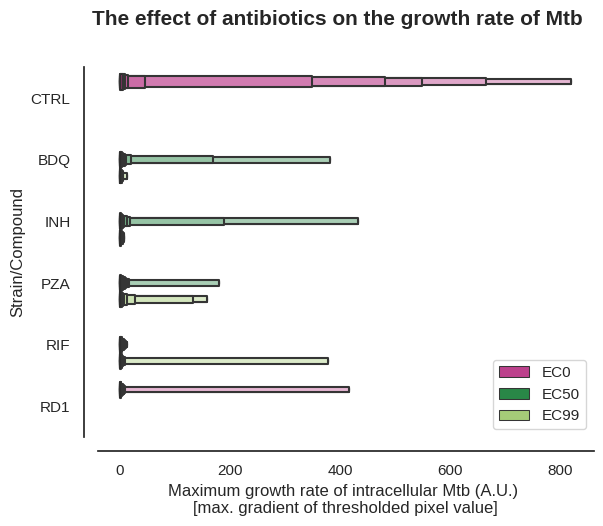

In [79]:
df
g = sns.boxenplot(x="Max. dMtb/dt", y="Strain/Compound",
            hue="Concentration", 
            palette=[expanded_piyg[-1], expanded_piyg[0], expanded_piyg[1]],
            data=df, 
            scale = 'linear'
              )  
sns.despine(offset = 10)
plt.xlabel("Maximum growth rate of intracellular Mtb (A.U.) \n[max. gradient of thresholded pixel value]")
plt.gcf().suptitle('The effect of antibiotics on the growth rate of Mtb', 
                   fontsize=15, fontweight='bold', 
                  y = 1.0)
sns.despine(offset=10)
plt.legend(loc = 'lower right')
# plt.savefig(os.path.join(output_dir, 'ATB_effect_max_growth_rate.png'), bbox_inches = 'tight', dpi = 314)

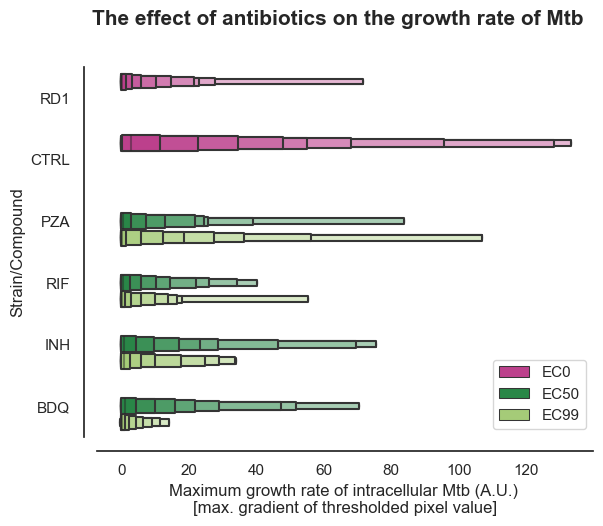

In [163]:
g = sns.boxenplot(x="Max. dMtb gradient", y="Strain/Compound",
            hue="Concentration", 
            palette=[expanded_piyg[-1], expanded_piyg[0], expanded_piyg[1]],
            data=df, 
            scale = 'linear'
              )  
sns.despine(offset = 10)
plt.xlabel("Maximum growth rate of intracellular Mtb (A.U.) \n[max. gradient of thresholded pixel value]")
plt.gcf().suptitle('The effect of antibiotics on the growth rate of Mtb', 
                   fontsize=15, fontweight='bold', 
                  y = 1.0)
sns.despine(offset=10)
plt.legend(loc = 'lower right')
plt.savefig(os.path.join(output_dir, 'ATB_effect_max_growth_rate.png'), bbox_inches = 'tight', dpi = 314)

In [92]:
help(sns.boxenplot)

Help on function boxenplot in module seaborn.categorical:

boxenplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, k_depth='tukey', linewidth=None, scale='exponential', outlier_prop=0.007, trust_alpha=0.05, showfliers=True, ax=None, box_kws=None, flier_kws=None, line_kws=None)
    Draw an enhanced box plot for larger datasets.
    
    This style of plot was originally named a "letter value" plot because it
    shows a large number of quantiles that are defined as "letter values".  It
    is similar to a box plot in plotting a nonparametric representation of a
    distribution in which all features correspond to actual observations. By
    plotting more quantiles, it provides more information about the shape of
    the distribution, particularly in the tails. For a more extensive
    explanation, you can read the paper that introduced the plot:
    https://vita.had.co.nz/papers/letter-v

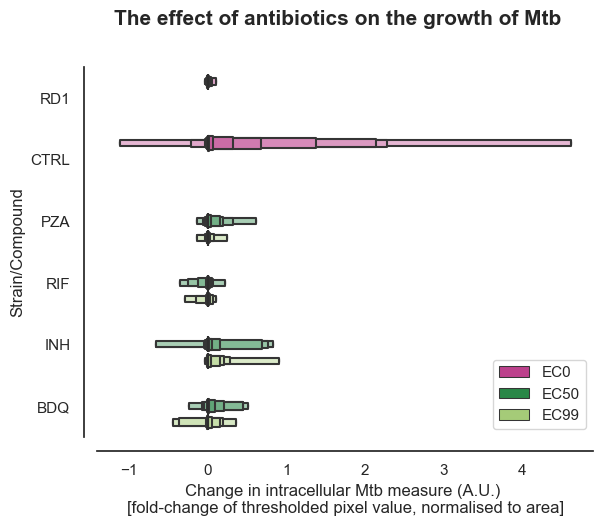

In [164]:
sns.boxenplot(x="dMtb", y="Strain/Compound",
            hue="Concentration", 
            palette=[expanded_piyg[-1], expanded_piyg[0], expanded_piyg[1]],
            data=df, 
            scale='linear'
              )  
sns.despine(offset = 10)
# plt.xlim(0,5)
plt.xlabel("Change in intracellular Mtb measure (A.U.) \n[fold-change of thresholded pixel value, normalised to area]")
plt.gcf().suptitle('The effect of antibiotics on the growth of Mtb', 
                   fontsize=15, fontweight='bold', 
                  y = 1.0)
sns.despine(offset=10)
plt.legend(loc = 'lower right')
plt.savefig(os.path.join(output_dir, 'dMtb_boxenplot.png'), bbox_inches = 'tight', dpi = 314)

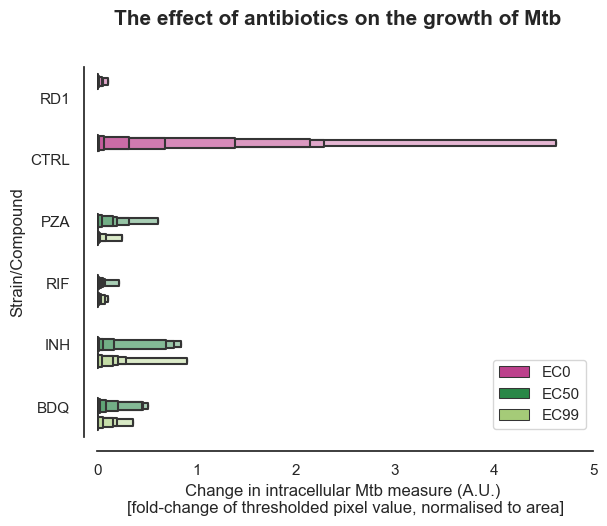

In [165]:
sns.boxenplot(x="dMtb", y="Strain/Compound",
            hue="Concentration", 
            palette=[expanded_piyg[-1], expanded_piyg[0], expanded_piyg[1]],
            data=df, 
            scale='linear'
              )  
sns.despine(offset = 10)
plt.xlim(0,5)
plt.xlabel("Change in intracellular Mtb measure (A.U.) \n[fold-change of thresholded pixel value, normalised to area]")
plt.gcf().suptitle('The effect of antibiotics on the growth of Mtb', 
                   fontsize=15, fontweight='bold', 
                  y = 1.0)
sns.despine(offset=10)
plt.legend(loc = 'lower right')
plt.savefig(os.path.join(output_dir, '+dMtb_boxenplot.png'), bbox_inches = 'tight', dpi = 314)

In [ ]:
for acq_ID in df['Acquisition ID'].unique():
    subset_df = [df['Acquisition ID'] == acq_ID]
    mean_max_dMtb_gradient = np.mean 